# Discriminative Classification
## Logistic Regression
---

__This page can be downloaded as__ [interactive jupyter notebook](./Logistic_Regression.ipynb)

---

In this notebook, we implement a logistic regression classifier using the `scikit-learn` library. The principle of logistic regression is to fit the parameters of a mapping function from an n-dimensional input feature $x = [x_1,x_2,...,x_n]$ directly to conditional probabilities $P(x\mid C=L^k)$ for each class $k$. In the binary case where we have two classes $L^1$ and $L^2$, the mapping is

$ P(x\mid C=L^1) = \sigma(p_0 + p_1\cdot x_1 + p_2\cdot x_2 + ...  + p_n\cdot x_n)$

and 

$ P(x\mid C=L^2) = 1 - P(x\mid C=L^1) $

where $\sigma$ is the logistic function

$\sigma(x) = \dfrac{1}{1+e^{-x}}$.

In the case more than two classes are to be separated, the softmax function is used to compute valid class probabilities. Training such a model is done by minimizing the cross entropy.


## Preparation
In order to implement the method, we import the required Python modules: 

In [3]:
import numpy as np                                   # Used for numerical computations
import matplotlib.pyplot as plt                      # Plotting library  
from sklearn.linear_model import LogisticRegression

# This is to set the size of the plots in the notebook
plt.rcParams['figure.figsize'] = [6, 6]    

### Creating a Toy Dataset
Next, we will create a toy dataset. It will contain samples which are drawn from 3 normal distributions, where each distribution represents a class. 

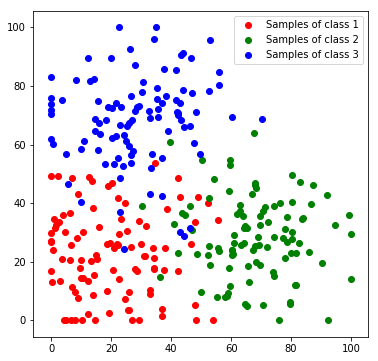

In [4]:
num_c = 3 # Number of clusters
colours = [[255, 170, 170], [170, 255, 170], [170, 170, 255]]

# Generate the samples (3 clusters), we set a fixed seed make the results reproducable
np.random.seed(0)
c1_samples = np.clip([(20, 20) + np.random.randn(2)*15 for i in range(100)], 0, 100)
c2_samples = np.clip([(70, 30) + np.random.randn(2)*15 for i in range(100)], 0, 100)
c3_samples = np.clip([(30, 70) + np.random.randn(2)*15 for i in range(100)], 0, 100)

# Plot the samples, colored by class
plt.scatter(*zip(*c1_samples), c='red', marker='o', label='Samples of class 1')
plt.scatter(*zip(*c2_samples), c='green', marker='o', label='Samples of class 2')
plt.scatter(*zip(*c3_samples), c='blue', marker='o', label='Samples of class 3')
plt.legend()
plt.show()

We stack all data samples to one matrix and append the class index as additional column. Each row in the resulting matrix contains one the x and y coordinates and the class index of one sample. 

In [5]:
c1_array = np.hstack((np.array(c1_samples), 1 * np.ones((len(c1_samples), 1))))
c2_array = np.hstack((np.array(c2_samples), 2 * np.ones((len(c2_samples), 1))))
c3_array = np.hstack((np.array(c3_samples), 3 * np.ones((len(c3_samples), 1))))

all_samples = np.vstack((c1_array, c2_array, c3_array))
print('Shape of stacked sample matrix:', all_samples.shape)

Shape of stacked sample matrix: (300, 3)


## Logistic regression

Next, the model is set up. Using the `scikit-learn` library, setting up the model and training it, requires only two lines of code:

In [16]:
# Generate the LR classifier
lr = LogisticRegression()

# Train the classifier
lr.fit(all_samples[:,:2], all_samples[:,2])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluation
For the evaluation we first classify each feature in the feature space to visualize the decision boundaries..

In [10]:
def predict_feature_space(model):
    label_map = np.zeros((100, 100, 3), dtype=np.ubyte)
    feature_space = []
    for x in range(100):
        for y in range(100):
            feature_space.append((x,y))
    feature_space = np.array(feature_space)
    labels = model.predict(feature_space)
    for x in range(100):
        for y in range(100):
            label = labels[x*100+y]
            label_map[y, x] = colours[int(label)-1]
    return label_map

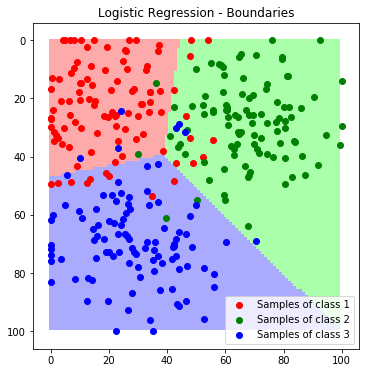

In [15]:
label_map = predict_feature_space(lr)

plt.imshow(label_map)
plt.scatter(*zip(*c1_samples), c='red', marker='o', label='Samples of class 1')
plt.scatter(*zip(*c2_samples), c='green', marker='o', label='Samples of class 2')
plt.scatter(*zip(*c3_samples), c='blue', marker='o', label='Samples of class 3')
plt.title('Logistic Regression - Boundaries'); plt.legend(); plt.show()

Since the model delivers a probabilistic output, we can not only predict classes, but also probabilities. In the next example we visualize the predicted probabilities instead of the final class label for the complete feature space:

In [12]:
def predict_feature_space_prob(model):
    label_map = np.zeros((100, 100, 3), dtype=np.ubyte)
    feature_space = []
    for x in range(100):
        for y in range(100):
            feature_space.append((x,y))
    feature_space = np.array(feature_space)
    probas = model.predict_proba(feature_space)
    for x in range(100):
        for y in range(100):
            proba = probas[x*100+y]
            label_map[y, x] = np.sum(colours*proba, axis=1).astype(np.ubyte)
    return label_map

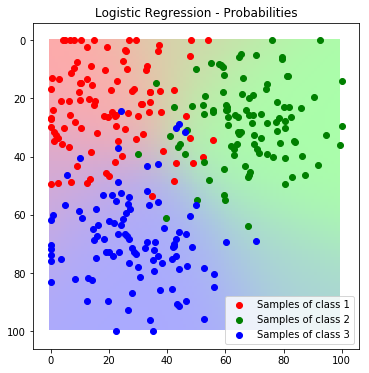

In [14]:
label_map_prob = predict_feature_space_prob(lr)

plt.imshow(label_map_prob)
plt.scatter(*zip(*c1_samples), c='red', marker='o', label='Samples of class 1')
plt.scatter(*zip(*c2_samples), c='green', marker='o', label='Samples of class 2')
plt.scatter(*zip(*c3_samples), c='blue', marker='o', label='Samples of class 3')
plt.title('Logistic Regression - Probabilities'); plt.legend(); plt.show()

## Discussion
Although logistic regression is not capable of learning complex mappings, unless we perform a feature space transformation, it is often used as a classification head for more complex models. For example most neural networks for classification or segmentation include a logistic regression classifier in the last layer of the network. It is thus important to understand the concept of this classifier. We saw, that setting up a logistic regression classifier requires only a few lines of code when we use the `scikit-learn` implementation. 

Following code-cell removes `In[]` / `Out[]` prompts left to code cells.

In [77]:
%%HTML
<style>div.prompt {display:none}</style>

---

<table>
  <tr>
    <td>Author:</td>
    <td>Dennis Wittich</td>
  </tr>
  <tr>
    <td>Last modified:</td>
    <td>09 / 05 / 2019</td>
  </tr>
</table> 